In [35]:
import sys
import os
# Add the code directory to Python path to enable importing scgen
# This allows the notebook to find scgen from the code/ directory
current_dir = os.getcwd()
# Try multiple possible locations for the code directory
possible_code_dirs = [
    os.path.join(current_dir, 'code'),  # If running from project root
    os.path.join(os.path.dirname(current_dir), 'code'),  # If running from Jupyter Notebooks/
    os.path.abspath('../code'),  # Relative path from Jupyter Notebooks/
]

for code_dir in possible_code_dirs:
    if os.path.exists(code_dir) and os.path.isdir(code_dir):
        if code_dir not in sys.path:
            sys.path.insert(0, code_dir)
        break


In [36]:
import os 
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import scgen
import seaborn as sns
from scipy import stats
import matplotlib
import scipy.sparse as sparse
font = {'family' : 'Arial',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.set_figure_params(dpi_save=300)

In [37]:
path_to_save = "../results/Figures/Figure 2/"
os.makedirs(path_to_save, exist_ok=True)
sc.settings.figdir = path_to_save

## Read PBMC Dataset

In [38]:
pbmc = sc.read("../data/train_pbmc.h5ad")
pbmc.obs["cell_type"].replace("CD4T", "CD4-T", inplace=True)
pbmc.obs["cell_type"].replace("CD8T", "CD8-T", inplace=True)
pbmc.obs["cell_type"].replace("Dendritic", "DC", inplace=True)
pbmc.obs["cell_type"].replace("FCGR3A+Mono", "F-Mono", inplace=True)
pbmc.obs["cell_type"].replace("CD14+Mono", "CD14-Mono", inplace=True)
pbmc

/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/anndata/_io/h5ad.py:267: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  return AnnData(**{
/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/anndata/_io/h5ad.py:267: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  return AnnData(**{
/tmp/ipykernel_47665/3952437167.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col

AnnData object with n_obs × n_vars = 16893 × 6998
    obs: 'condition', 'n_counts', 'n_genes', 'mt_frac', 'cell_type'
    var: 'gene_symbol', 'n_cells'
    uns: 'cell_type_colors', 'condition_colors', 'neighbors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'distances', 'connectivities'

In [39]:
pbmc.obs['condition'].value_counts()

condition
stimulated    8886
control       8007
Name: count, dtype: int64

In [40]:
pbmc.obs['cell_type'].value_counts()

cell_type
CD4-T        5564
F-Mono       3601
CD14-Mono    2561
B            1811
NK           1163
CD8-T        1115
DC           1078
Name: count, dtype: int64

In [41]:
pbmc.obs.groupby(['condition', 'cell_type']).size()

/tmp/ipykernel_47665/3879937159.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pbmc.obs.groupby(['condition', 'cell_type']).size()


condition   cell_type
control     CD4-T        2437
            CD14-Mono    1946
            B             818
            CD8-T         574
            NK            517
            F-Mono       1100
            DC            615
stimulated  CD4-T        3127
            CD14-Mono     615
            B             993
            CD8-T         541
            NK            646
            F-Mono       2501
            DC            463
dtype: int64

In [42]:
cd4t = pbmc[pbmc.obs["cell_type"] == "CD4-T"]
cd4t

View of AnnData object with n_obs × n_vars = 5564 × 6998
    obs: 'condition', 'n_counts', 'n_genes', 'mt_frac', 'cell_type'
    var: 'gene_symbol', 'n_cells'
    uns: 'cell_type_colors', 'condition_colors', 'neighbors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    obsp: 'distances', 'connectivities'

### Figure 2.a

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

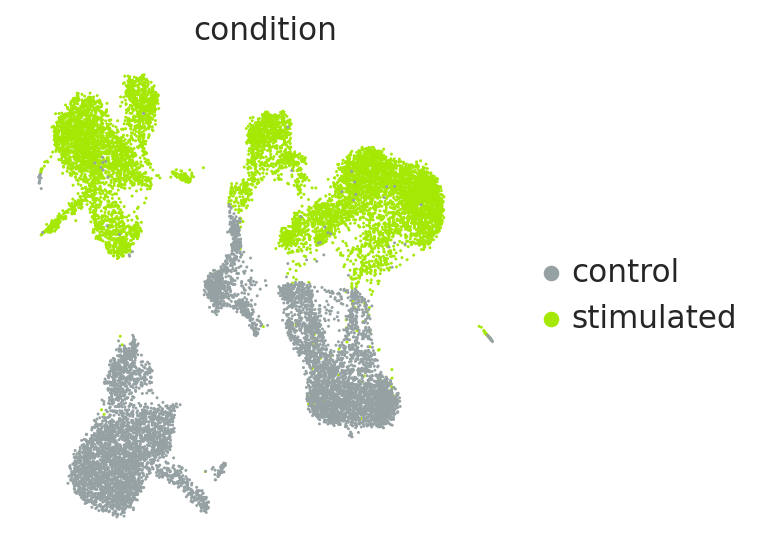

In [43]:
sc.set_figure_params(fontsize=14)
sc.pp.neighbors(pbmc)
sc.tl.umap(pbmc)
sc.pl.umap(pbmc, color=["condition"],
           legend_fontsize=14,
           palette=["#96a1a3", "#A4E804"],
           save=f"_conditions.pdf",
           show=True, 
           frameon=False)
os.rename(src=os.path.join(path_to_save, "umap_conditions.pdf"), 
          dst=os.path.join(path_to_save, "Fig2a_umap_conditions.pdf"))

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

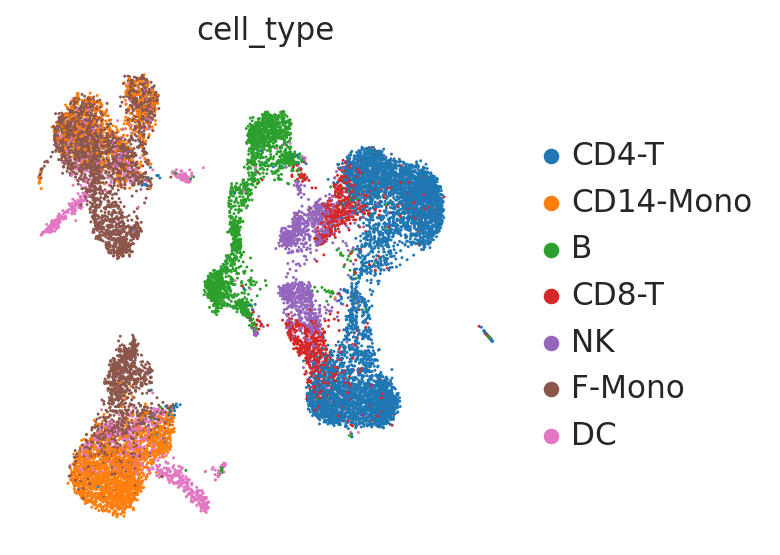

In [44]:
sc.pp.neighbors(pbmc)
sc.tl.umap(pbmc)
sc.pl.umap(pbmc, color=["cell_type"],
           legend_fontsize=14,
           save=f"_celltypes.pdf",
           show=True,
           frameon=False)
os.rename(src=os.path.join(path_to_save, "umap_celltypes.pdf"), 
          dst=os.path.join(path_to_save, "Fig2a_umap_celltypes.pdf"))

### Figure 2.b

In [45]:
pbmc_reconstructed = sc.read("../data/reconstructed/scGen/pbmc.h5ad")
pbmc_reconstructed

AnnData object with n_obs × n_vars = 24900 × 6998
    obs: 'condition', 'cell_type', 'batch'

In [46]:
network = scgen.VAEArith(z_dimension=100, 
                         x_dimension=pbmc.shape[1],
                         model_path="../models/scGen/pbmc/CD4T/scgen")
network.restore_model()

GPU devices available: ['/device:GPU:0']
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA L40S, pci bus id: 0000:34:00.0, compute capability: 8.9

eros: (Const): /job:localhost/replica:0/task:0/device:GPU:0
encoder/dense_3/bias/Adam_1: (VarHandleOp): /job:localhost/replica:0/task:0/device:GPU:0
decoder/dense_4/kernel/Adam/Initializer/zeros/shape_as_tensor: (Const): /job:localhost/replica:0/task:0/device:GPU:0
decoder/dense_4/kernel/Adam/Initializer/zeros/Const: (Const): /job:localhost/replica:0/task:0/device:GPU:0
decoder/dense_4/kernel/Adam: (VarHandleOp): /job:localhost/replica:0/task:0/device:GPU:0
decoder/dense_4/kernel/Adam_1/Initializer/zeros/shape_as_tensor: (Const): /job:localhost/replica:0/task:0/device:GPU:0
decoder/dense_4/kernel/Adam_1/Initializer/zeros/Const: (Const): /job:localhost/replica:0/task:0/device:GPU:0
decoder/dense_4/kernel/Adam_1: (VarHandleOp): /job:localhost/replica:0/task:0/device:GPU:0
decoder/decoder_bn_800/scale/Adam

I0000 00:00:1767141451.331280   47665 gpu_device.cc:2019] Created device /device:GPU:0 with 867 MB memory:  -> device: 0, name: NVIDIA L40S, pci bus id: 0000:34:00.0, compute capability: 8.9
I0000 00:00:1767141451.337917   47665 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 867 MB memory:  -> device: 0, name: NVIDIA L40S, pci bus id: 0000:34:00.0, compute capability: 8.9
2025-12-31 00:37:31.378611: I tensorflow/core/common_runtime/placer.cc:162] global_step: (VariableV2): /job:localhost/replica:0/task:0/device:CPU:0
2025-12-31 00:37:31.378634: I tensorflow/core/common_runtime/placer.cc:162] global_step/Assign: (Assign): /job:localhost/replica:0/task:0/device:CPU:0
2025-12-31 00:37:31.378639: I tensorflow/core/common_runtime/placer.cc:162] global_step/read: (Identity): /job:localhost/replica:0/task:0/device:CPU:0
2025-12-31 00:37:31.378652: I tensorflow/core/common_runtime/placer.cc:162] encoder/dense_7/kernel/Initializer/random_uniform/RandomUnifo

INFO:tensorflow:Restoring parameters from ../models/scGen/pbmc/CD4T/scgen


2025-12-31 00:37:31.586397: W tensorflow/core/framework/op_kernel.cc:1857] OP_REQUIRES failed at save_restore_v2_ops.cc:232 : NOT_FOUND: Key decoder/dense_11/kernel not found in checkpoint
2025-12-31 00:37:31.586425: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: NOT_FOUND: Key decoder/dense_11/kernel not found in checkpoint
	 [[{{node save/RestoreV2}}]]
2025-12-31 00:37:31.586435: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 9131381259486199081
2025-12-31 00:37:31.586441: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 10631504018584748365
2025-12-31 00:37:31.586446: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 8934105269770306061
2025-12-31 00:37:31.586450: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous recv item cancelled. Key hash: 1811572328383791
2

NotFoundError: Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Graph execution error:

Detected at node 'save/RestoreV2' defined at (most recent call last):
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/runpy.py", line 198, in _run_module_as_main
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/runpy.py", line 88, in _run_code
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 758, in start
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 211, in start
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/asyncio/base_events.py", line 645, in run_forever
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/asyncio/base_events.py", line 1999, in _run_once
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/asyncio/events.py", line 88, in _run
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 614, in shell_main
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_shell
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 366, in execute_request
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 827, in execute_request
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 458, in do_execute
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 663, in run_cell
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3123, in run_cell
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3178, in _run_cell
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3400, in run_cell_async
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3641, in run_ast_nodes
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3701, in run_code
    File "/tmp/ipykernel_47665/2125259702.py", line 1, in <module>
    File "/home/sagemaker-user/scgen-reproducibility/Jupyter Notebooks/scgen/models/_vae.py", line 76, in __init__
Node: 'save/RestoreV2'
Detected at node 'save/RestoreV2' defined at (most recent call last):
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/runpy.py", line 198, in _run_module_as_main
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/runpy.py", line 88, in _run_code
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 758, in start
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 211, in start
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/asyncio/base_events.py", line 645, in run_forever
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/asyncio/base_events.py", line 1999, in _run_once
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/asyncio/events.py", line 88, in _run
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 614, in shell_main
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_shell
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 366, in execute_request
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 827, in execute_request
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 458, in do_execute
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 663, in run_cell
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3123, in run_cell
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3178, in _run_cell
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3400, in run_cell_async
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3641, in run_ast_nodes
    File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3701, in run_code
    File "/tmp/ipykernel_47665/2125259702.py", line 1, in <module>
    File "/home/sagemaker-user/scgen-reproducibility/Jupyter Notebooks/scgen/models/_vae.py", line 76, in __init__
Node: 'save/RestoreV2'
2 root error(s) found.
  (0) NOT_FOUND: Key decoder/dense_11/kernel not found in checkpoint
	 [[{{node save/RestoreV2}}]]
	 [[save/RestoreV2/_33]]
  (1) NOT_FOUND: Key decoder/dense_11/kernel not found in checkpoint
	 [[{{node save/RestoreV2}}]]
0 successful operations.
0 derived errors ignored.

Original stack trace for 'save/RestoreV2':
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/runpy.py", line 198, in _run_module_as_main
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/runpy.py", line 88, in _run_code
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 758, in start
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 211, in start
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/asyncio/base_events.py", line 645, in run_forever
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/asyncio/base_events.py", line 1999, in _run_once
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/asyncio/events.py", line 88, in _run
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 614, in shell_main
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_shell
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 366, in execute_request
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 827, in execute_request
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 458, in do_execute
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 663, in run_cell
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3123, in run_cell
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3178, in _run_cell
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3400, in run_cell_async
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3641, in run_ast_nodes
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3701, in run_code
  File "/tmp/ipykernel_47665/2125259702.py", line 1, in <module>
  File "/home/sagemaker-user/scgen-reproducibility/Jupyter Notebooks/scgen/models/_vae.py", line 76, in __init__
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tensorflow/python/training/saver.py", line 934, in __init__
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tensorflow/python/training/saver.py", line 946, in build
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tensorflow/python/training/saver.py", line 974, in _build
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tensorflow/python/training/saver.py", line 543, in _build_internal
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tensorflow/python/training/saver.py", line 360, in _AddRestoreOps
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tensorflow/python/training/saver.py", line 611, in bulk_restore
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1522, in restore_v2
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tensorflow/python/framework/op_def_library.py", line 796, in _apply_op_helper
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tensorflow/python/framework/ops.py", line 2705, in _create_op_internal
  File "/home/sagemaker-user/.conda/envs/scgen-repro-env/lib/python3.12/site-packages/tensorflow/python/framework/ops.py", line 1200, in from_node_def


In [ ]:
conditions = {"ctrl": "CD4T_ctrl", "pred_stim": "CD4T_pred_stim", "real_stim": "CD4T_real_stim"}
cd4t_reconstructed = pbmc_reconstructed[pbmc_reconstructed.obs["condition"].isin(conditions.values())]
cd4t_reconstructed

In [ ]:
cd4t = pbmc[pbmc.obs["cell_type"] == "CD4-T"]
sc.tl.rank_genes_groups(cd4t, groupby="condition", n_genes=100, method="wilcoxon")
diff_genes_cd4t = cd4t.uns["rank_genes_groups"]["names"]["stimulated"]

In [ ]:
def replace_conditions(adata):
    adata.obs["condition"].replace("CD4T_ctrl", "CD4-T_ctrl", inplace=True)
    adata.obs["condition"].replace("CD4T_real_stim", "CD4-T_real_stim", inplace=True)
    adata.obs["condition"].replace("CD4T_pred_stim", "CD4-T_pred_stim", inplace=True)

    adata.obs["condition"].replace("CD8T_ctrl", "CD8-T_ctrl", inplace=True)
    adata.obs["condition"].replace("CD8T_real_stim", "CD8-T_real_stim", inplace=True)
    adata.obs["condition"].replace("CD8T_pred_stim", "CD8-T_pred_stim", inplace=True)

    adata.obs["condition"].replace("Dendritic_ctrl", "DC_ctrl", inplace=True)
    adata.obs["condition"].replace("Dendritic_real_stim", "DC_real_stim", inplace=True)
    adata.obs["condition"].replace("Dendritic_pred_stim", "DC_pred_stim", inplace=True)

    adata.obs["condition"].replace("FCGR3A+Mono_ctrl", "F-Mono_ctrl", inplace=True)
    adata.obs["condition"].replace("FCGR3A+Mono_real_stim", "F-Mono_real_stim", inplace=True)
    adata.obs["condition"].replace("FCGR3A+Mono_pred_stim", "F-Mono_pred_stim", inplace=True)

    adata.obs["condition"].replace("CD14+Mono_ctrl", "CD14-Mono_ctrl", inplace=True)
    adata.obs["condition"].replace("CD14+Mono_real_stim", "CD14-Mono_real_stim", inplace=True)
    adata.obs["condition"].replace("CD14+Mono_pred_stim", "CD14-Mono_pred_stim", inplace=True)
def replace_cell_types(adata):
    adata.obs["cell_type"].replace("CD4T", "CD4-T", inplace=True)
    adata.obs["cell_type"].replace("CD8T", "CD8-T", inplace=True)
    adata.obs["cell_type"].replace("Dendritic", "DC", inplace=True)
    adata.obs["cell_type"].replace("FCGR3A+Mono", "F-Mono", inplace=True)
    adata.obs["cell_type"].replace("CD14+Mono", "CD14-Mono", inplace=True)

In [ ]:
conditions = {"ctrl": "CD4-T_ctrl", "pred_stim": "CD4-T_pred_stim", "real_stim": "CD4-T_real_stim"}

In [ ]:
replace_conditions(pbmc_reconstructed)
replace_conditions(cd4t_reconstructed)
replace_cell_types(pbmc_reconstructed)
replace_cell_types(cd4t_reconstructed)

In [ ]:
sns.set()
scgen.plotting.reg_mean_plot(cd4t_reconstructed, 
                             condition_key="condition",
                             axis_keys={"x": conditions["pred_stim"], "y": conditions["real_stim"]},
                             gene_list=diff_genes_cd4t[:5],
                             top_100_genes=diff_genes_cd4t,
                             path_to_save=os.path.join(path_to_save, f"Fig2b_reg_mean.pdf"),
                             legend=False,
                             labels={"x": "pred stim", "y":"real stim"},
                             show=True,
                             fontsize=20,
                             textsize=14,
                             title="CD4-T",
                             x_coeff=0.55, 
                             range=[0, 5, 1])

In [ ]:
print(cd4t_reconstructed.obs['condition'].value_counts())

### Fig 2.c

In [ ]:
def calc_R2(adata, cell_type, n_genes=6998, conditions=None):
    if n_genes != adata.shape[1]:
        celldata = adata.copy()[adata.obs["cell_type"] == cell_type]
        print(celldata.obs["condition"].unique().tolist())
        sc.tl.rank_genes_groups(celldata, groupby="condition", n_genes=n_genes, method="wilcoxon")
        diff_genes = celldata.uns["rank_genes_groups"]["names"][conditions["real_stim"]]
        adata = adata[:, diff_genes.tolist()]
    r_values = np.zeros((1, 100))
    real_stim = adata[adata.obs["condition"] == conditions["real_stim"]]
    pred_stim = adata[adata.obs["condition"] == conditions["pred_stim"]]
    for i in range(100):
        pred_stim_idx = np.random.choice(range(0, pred_stim.shape[0]), int(0.8 * pred_stim.shape[0]))
        real_stim_idx = np.random.choice(range(0, real_stim.shape[0]), int(0.8 * real_stim.shape[0]))
        if sparse.issparse(pred_stim.X):
            pred_stim.X = pred_stim.X.A
            real_stim.X = real_stim.X.A
        x = np.average(pred_stim.X[pred_stim_idx], axis=0)
        y = np.average(real_stim.X[real_stim_idx], axis=0)
        m, b, r_value, p_value, std_err = stats.linregress(x, y)
        r_values[0, i] = r_value ** 2
    return r_values.mean(), r_values.std()

In [ ]:
def calc_R2_mean_var(adata, cell_types, n_genes):
    r2_means, r2_vars = [], []
    for cell_type in cell_types:
        conditions = {"real_stim": cell_type+"_real_stim", "pred_stim": cell_type+"_pred_stim"}
        r2_mean, r2_var = calc_R2(adata, cell_type, n_genes=n_genes, conditions=conditions)
        r2_means.append(r2_mean)
        r2_vars.append(r2_var)
    return r2_means, r2_vars

In [ ]:
def calc_R2_specific_model(adata, n_genes, conditions):
    if n_genes != adata.shape[1]:
        sc.tl.rank_genes_groups(adata, groupby="condition", n_genes=n_genes, method="wilcoxon")
        diff_genes = adata.uns["rank_genes_groups"]["names"][conditions["real_stim"]]
        adata = adata[:, diff_genes.tolist()]
    r2_means, r2_vars = [], []
    r_values = np.zeros((1, 100))
    real_stim = adata[adata.obs["condition"] == conditions["real_stim"]]
    pred_stim = adata[adata.obs["condition"] == conditions["pred_stim"]]
    for i in range(100):
        pred_stim_idx = np.random.choice(range(0, pred_stim.shape[0]), int(0.8 * pred_stim.shape[0]))
        real_stim_idx = np.random.choice(range(0, real_stim.shape[0]), int(0.8 * real_stim.shape[0]))
        if sparse.issparse(pred_stim.X):
            pred_stim.X = pred_stim.X.A
            real_stim.X = real_stim.X.A
        x = np.average(pred_stim.X[pred_stim_idx], axis=0)
        y = np.average(real_stim.X[real_stim_idx], axis=0)
        m, b, r_value, p_value, std_err = stats.linregress(x, y)
        r_values[0, i] = r_value ** 2
    print(r_values.mean(), r_values.std())
    return r_values.mean(), r_values.std()

In [ ]:
cell_types_colnames = ["B", "CD14-Mono", "CD4-T", "CD8-T", "DC", "F-Mono", "NK"]
cell_types = ["B", "CD14-Mono", "CD4-T", "CD8-T", "DC", "F-Mono", "NK"]
r2_top100_means, r2_top100_vars = calc_R2_mean_var(pbmc_reconstructed, cell_types=cell_types_colnames, n_genes=100)
r2_all_means, r2_all_vars = calc_R2_mean_var(pbmc_reconstructed, cell_types=cell_types_colnames, n_genes=pbmc_reconstructed.shape[1])

In [ ]:
all_means = np.concatenate((r2_top100_means, r2_all_means), axis=0)
all_vars = np.concatenate((r2_top100_vars, r2_all_vars), axis=0)
all_types = ["top 100 DEGs"] * 7 + ["all genes"] * 7
cell_types_x = 2 * cell_types
df = pd.DataFrame({"R^2 Means": all_means, "R^2 Stddevs": all_vars, "Type": all_types, "Cell Types": cell_types_x})
print(df[df["Type"] == "top 100 DEGs"].mean())
print(df[df["Type"] == "all genes"].mean())
df

In [ ]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2., 1.01 * height,
                '%.2f' % float(height),
                ha='center', va='bottom', fontsize=18)


In [ ]:
def grouped_barplot(df, cat, subcat, val, err, filename, put_label=False, legend=False, offset=0.375):
    plt.close("all")
#     import matplotlib
    matplotlib.rc('ytick', labelsize=25)
    matplotlib.rc('xtick', labelsize=30)
    u = df[cat].unique()
    x_pos = np.arange(0, 2*len(u), 2)
    subx = df[subcat].unique()
    plt.figure(figsize=(12, 10))
#     g = sns.catplot(x=cat, y=val, hue=subcat, data=df, kind='bar', palette="muted", height=6, legend=False)
#     g.despine(left=True)
#     plt.yticks(np.arange(0, 1.2, 0.2))
#     g.set_xticklabels(rotation=90)
#     g.set_xlabels("")
    for i, gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        b = plt.bar(x_pos + i/1.25, dfg[val].values, capsize=10, alpha=0.95, label=f"{gr}", yerr=dfg[err].values)
        a=np.random.normal(dfg[val].values, dfg[err].values, (10, len(u)))
#         print(a.shape)
#         dfc=pd.DataFrame({'x': x_pos + i/1.25, 'y': a[0]})
        plt.plot(x_pos + i/1.25, a.T, '.', color='black', alpha=0.5)
        if put_label:
            autolabel(b)
    
    plt.ylabel(r"$\mathrm{R^2}$", fontsize=25)
    plt.xticks(x_pos+offset, u, rotation=90)
    if legend:
        plt.legend(bbox_to_anchor=(1.05,0.5), loc="center left", borderaxespad=0, prop={'size': 18})
    plt.tight_layout()
    plt.savefig(os.path.join(path_to_save, filename), dpi=300)
    plt.show()

In [ ]:
sns.set()
grouped_barplot(df, "Cell Types", "Type", "R^2 Means", "R^2 Stddevs", legend=True, filename="Fig2c_celltypes_barplots.pdf")

In [ ]:
stgan_reconstructed = sc.read("../data/reconstructed/CGAN/CGAN_CD4T.h5ad")
pca_reconstructed = sc.read("../data/reconstructed/PCAVecArithm/PCA_CD4T.h5ad")
ges_reconstructed = sc.read("../data/reconstructed/VecArithm/VecArithm_CD4T.h5ad")
cvae_reconstructed = sc.read("../data/reconstructed/CVAE/CVAE_CD4T.h5ad")
replace_conditions(cvae_reconstructed)

In [ ]:
ctrl = cd4t_reconstructed[cd4t_reconstructed.obs["condition"] == "CD4-T_ctrl"]
real_stim = cd4t_reconstructed[cd4t_reconstructed.obs["condition"] == "CD4-T_real_stim"]
scgen_pred_stim = cd4t_reconstructed[cd4t_reconstructed.obs["condition"] == "CD4-T_pred_stim"]
stgan_pred_stim = stgan_reconstructed[stgan_reconstructed.obs["condition"] == "pred_stim"]
ges_pred_stim = ges_reconstructed[ges_reconstructed.obs["condition"] == "pred_stim"]
pca_pred_stim = pca_reconstructed[pca_reconstructed.obs["condition"] == "pred_stim"]
cvae_pred_stim = cvae_reconstructed[cvae_reconstructed.obs["condition"] == "CD4-T_pred_stim"]

In [ ]:
if sparse.issparse(cvae_pred_stim.X):
    cvae_pred_stim.X = cvae_pred_stim.X.A

In [ ]:
ctrl.obs["condition"] = "control"
real_stim.obs["condition"] = "stimulation real"
scgen_pred_stim.obs["condition"] = "scGen"
cvae_pred_stim.obs["condition"] = "CVAE"
stgan_pred_stim.obs["condition"] = "style transfer GAN"
ges_pred_stim.obs["condition"] = "Vec. Arithm."
pca_pred_stim.obs["condition"] = "PCA + Vec. Arithm."

In [ ]:
models = ctrl.concatenate(real_stim, scgen_pred_stim, cvae_pred_stim, stgan_pred_stim, ges_pred_stim, pca_pred_stim)
models.obs["condition"].unique()

In [ ]:
var_temp = models.var_names.tolist()
var_temp[var_temp.index("ISG15")] = "ISG15 in CD4-T"
models.var_names = var_temp

In [ ]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys="ISG15 in CD4-T", 
             groupby="condition", 
             rotation=90,
             show=True,
             order=models.obs["condition"].unique().tolist(),
             color = "#ee0ef0",
             save="_model_cmpr.pdf"
            )
os.rename(src=os.path.join(path_to_save, "violin_model_cmpr.pdf"), 
          dst=os.path.join(path_to_save, "Fig2d_model_comparison.pdf"))

In [ ]:
models.obs['condition'].value_counts()

In [ ]:
conditions = {"real_stim": "CD4-T_real_stim", "pred_stim": "CD4-T_pred_stim"}
scgen_r2_mean, scgen_r2_var = calc_R2_specific_model(cd4t_reconstructed, n_genes=6998, conditions=conditions)
cvae_r2_mean, cvae_r2_var = calc_R2_specific_model(cvae_reconstructed, n_genes=6998, conditions=conditions)

In [ ]:
if sparse.issparse(cvae_reconstructed.X):
    cvae_reconstructed.X = cvae_reconstructed.X.A

In [ ]:
conditions = {"real_stim": "real_stim", "pred_stim": "pred_stim"}
ges_r2_mean, ges_r2_var = calc_R2_specific_model(ges_reconstructed, n_genes=6998, conditions=conditions)
pca_r2_mean, pca_r2_var = calc_R2_specific_model(pca_reconstructed, n_genes=6998, conditions=conditions)
stgan_r2_mean, stgan_r2_var = calc_R2_specific_model(stgan_reconstructed, n_genes=6998, conditions=conditions)

In [ ]:
all_means = np.array([scgen_r2_mean, cvae_r2_mean, stgan_r2_mean, ges_r2_mean, pca_r2_mean])
all_vars = np.array([scgen_r2_var, cvae_r2_var, stgan_r2_var, ges_r2_var, pca_r2_var])
all_types = ["All genes"] * 5
models = ["scGen", "CVAE", "style transfer GAN", "Vec. Arithm.", "PCA + Vec. Arithm.", ]
df = pd.DataFrame({"R^2 Means": all_means, "R^2 Stddevs": all_vars, "Type": all_types, "Models": models})
df

In [ ]:
font = {'family' : 'Arial',
        'size'   : 2}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
grouped_barplot(df, "Models", "Type", "R^2 Means", "R^2 Stddevs", put_label=True, legend=False, filename="Fig2e_models_barplots.pdf", offset=0.0)

### Fig 2.g

In [ ]:
gene_list = ["CD3D", "CCL5", "GNLY", "CD79A", "FCGR3A", "S100A9", "HLA-DQA1", 
             "ISG15", "IFI6", "IFIT1", "CXCL10", "CXCL11", "APOBEC3A", "DEFB1", 
             "CCL8", "TARBP1"]
pbmc_reconstructed.obs["condition"].replace("CD14+Mono_ctrl", "CD14-Mono_ctrl", inplace=True)
pbmc_reconstructed.obs["condition"].replace("CD14+Mono_real_stim", "CD14-Mono_real_stim", inplace=True)
pbmc_reconstructed.obs["condition"].replace("CD14+Mono_pred_stim", "CD14-Mono_pred_stim", inplace=True)
pbmc_reconstructed.obs["condition"].replace("Dendritic_ctrl", "DC_ctrl", inplace=True)
pbmc_reconstructed.obs["condition"].replace("Dendritic_real_stim", "DC_real_stim", inplace=True)
pbmc_reconstructed.obs["condition"].replace("Dendritic_pred_stim", "DC_pred_stim", inplace=True)
pbmc_reconstructed.obs["condition"].replace("FCGR3A+Mono_ctrl", "F-Mono_ctrl", inplace=True)
pbmc_reconstructed.obs["condition"].replace("FCGR3A+Mono_real_stim", "F-Mono_real_stim", inplace=True)
pbmc_reconstructed.obs["condition"].replace("FCGR3A+Mono_pred_stim", "F-Mono_pred_stim", inplace=True)

In [ ]:
sc.set_figure_params(fontsize=14)
sc.pl.dotplot(pbmc_reconstructed, var_names=gene_list, groupby="condition", save=".pdf", show=True)
os.rename(src=os.path.join(path_to_save, "dotplot.pdf"), 
          dst=os.path.join(path_to_save, "Fig2f_dotplot.pdf"))

In [ ]:
pbmc_reconstructed.obs['condition'].value_counts()